<a href="https://colab.research.google.com/github/volgasezen/is584/blob/main/Lab 4/Part 1 - Word Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Space Models

In this tutorial, we will explore cosine similarity, and Euclidean distances. Then, we will analyze a pretrained word vector. 

## Cosine Similarity and Euclidean  Distance

We will now explore the difference between Euclidean distance and cosine distance.

In [1]:
from scipy.spatial.distance import euclidean,cosine
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

Assume that we have two documents about neural networks and a reference corpus.  We want to determine which document belongs to this corpus by considering the frequencies of  "torchtext" and "pytorch" keywords present in the documents. The below figure displays the frequencies of these words in the documents.

In [2]:
papers = {
    "paper1": [30, 60],
    "paper2": [30, 10],
    "corpus": [10, 30]
}

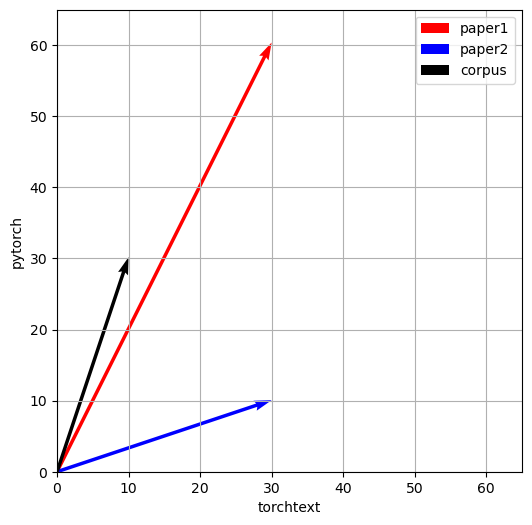

In [3]:
plt.figure(figsize=(6,6))
for item, var, c in zip(papers.keys(), papers.values(), ['r','b','k']):
    plt.quiver(0, 0, var[0], var[1], scale= 65, color=c, label=item)

axes = plt.gca()
axes.set_xlim([0,65])
axes.set_ylim([0,65])
axes.set_xlabel('torchtext')
axes.set_ylabel('pytorch')
plt.grid()
plt.legend()
plt.show()

The Euclidean distance and cosine similarity calculations between the documents and the corpus are as follows:

In [4]:
print('Euclidean  distance between paper1 and corpus:' , euclidean(papers['paper1'], papers['corpus']))
print('Euclidean  distance between paper2 and corpus:' , euclidean(papers['paper2'], papers['corpus']))

Euclidean  distance between paper1 and corpus: 36.05551275463989
Euclidean  distance between paper2 and corpus: 28.284271247461902


In [5]:
print('Cosine similarity between paper1 and corpus:' , cosine_similarity([papers['paper1']], [papers['corpus']])[0][0])
print('Cosine similarty between paper2 and corpus:' , cosine_similarity([papers['paper2']], [papers['corpus']])[0][0])

Cosine similarity between paper1 and corpus: 0.9899494936611667
Cosine similarty between paper2 and corpus: 0.6


Euclidean distances show that the second paper is closer to our corpus compared to the first document. On the other hand, cosine similarity shows that the first paper is more similar to the corpus.

The reason is that Euclidean distance simply measures the distance between the vectors while the cosine similarity measures the angle.

## Pretrained Word Vectors

For this topic we will use Gensim library. Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Firstly, let's import the required libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.test import utils
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import gensim.downloader

For convenience, we will use the pre-trained word vector Glove. Gensim gives support for converting it to word2vec format.

GloVe's project page and the pre-trained word vectors can be found [Standford's NLP group](https://nlp.stanford.edu/projects/glove/) and  [under same project page](https://nlp.stanford.edu/data/glove.6B.zip) respectively. We will discuss GloVe in more detail in the next part of the tutorial.

We will use a 100-dimensional network for this example. Feel free to try other ones.


In [7]:
data = gensim.downloader.load('glove-wiki-gigaword-100')

As mentioned in lecture we use cosine similarity to measure similarity between two words.

In [8]:
data.similarity("apple","pear")

0.5890126

In [9]:
data.similarity("door","pen")

0.34099883

The function `most_similar` is also very useful. This function lists the closest words by looking their cosine similarity in descending order.

In [10]:
data.most_similar('apple')

[('microsoft', 0.7449405789375305),
 ('ibm', 0.6821643114089966),
 ('intel', 0.6778087615966797),
 ('software', 0.6775422692298889),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.66175377368927),
 ('iphone', 0.6595611572265625),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579389572144)]

In [11]:
data.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

We can also employ the functions `positive` and  `negative` attiributes to perform vector substraction.

In [12]:
data.most_similar(positive=["female","king"],negative =["male"])  #removing male from king and adding female gives queen

[('queen', 0.7530024647712708),
 ('prince', 0.7241037487983704),
 ('brother', 0.6881160736083984),
 ('monarch', 0.6810022592544556),
 ('george', 0.6763365864753723),
 ('father', 0.6737973093986511),
 ('son', 0.6680604219436646),
 ('kingdom', 0.6605274677276611),
 ('uncle', 0.6432946920394897),
 ('edward', 0.6366986036300659)]

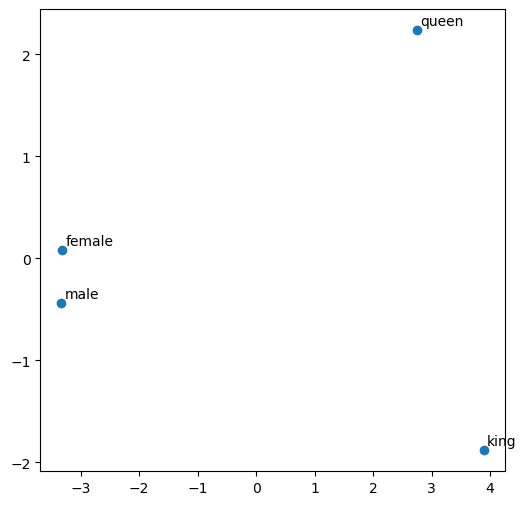

In [13]:
words = ["king","queen","male","female"]

word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)

In [14]:
data.most_similar(positive=["short","fast"],negative =["slow"]) #similarly removing slow from fast adding short give long

[('long', 0.6932044625282288),
 ('four', 0.6256639361381531),
 ('times', 0.6254057288169861),
 ('limited', 0.6253914833068848),
 ('shorter', 0.623638391494751),
 ('one', 0.6235552430152893),
 ('full', 0.6227924227714539),
 ('three', 0.6204847693443298),
 ('five', 0.6187273859977722),
 ('time', 0.6181093454360962)]

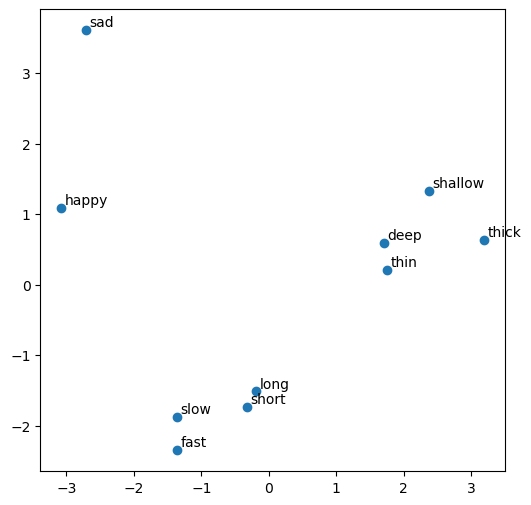

In [15]:
words = ["short","long","fast","slow","thin","thick","sad","happy","shallow", "deep"]

word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)

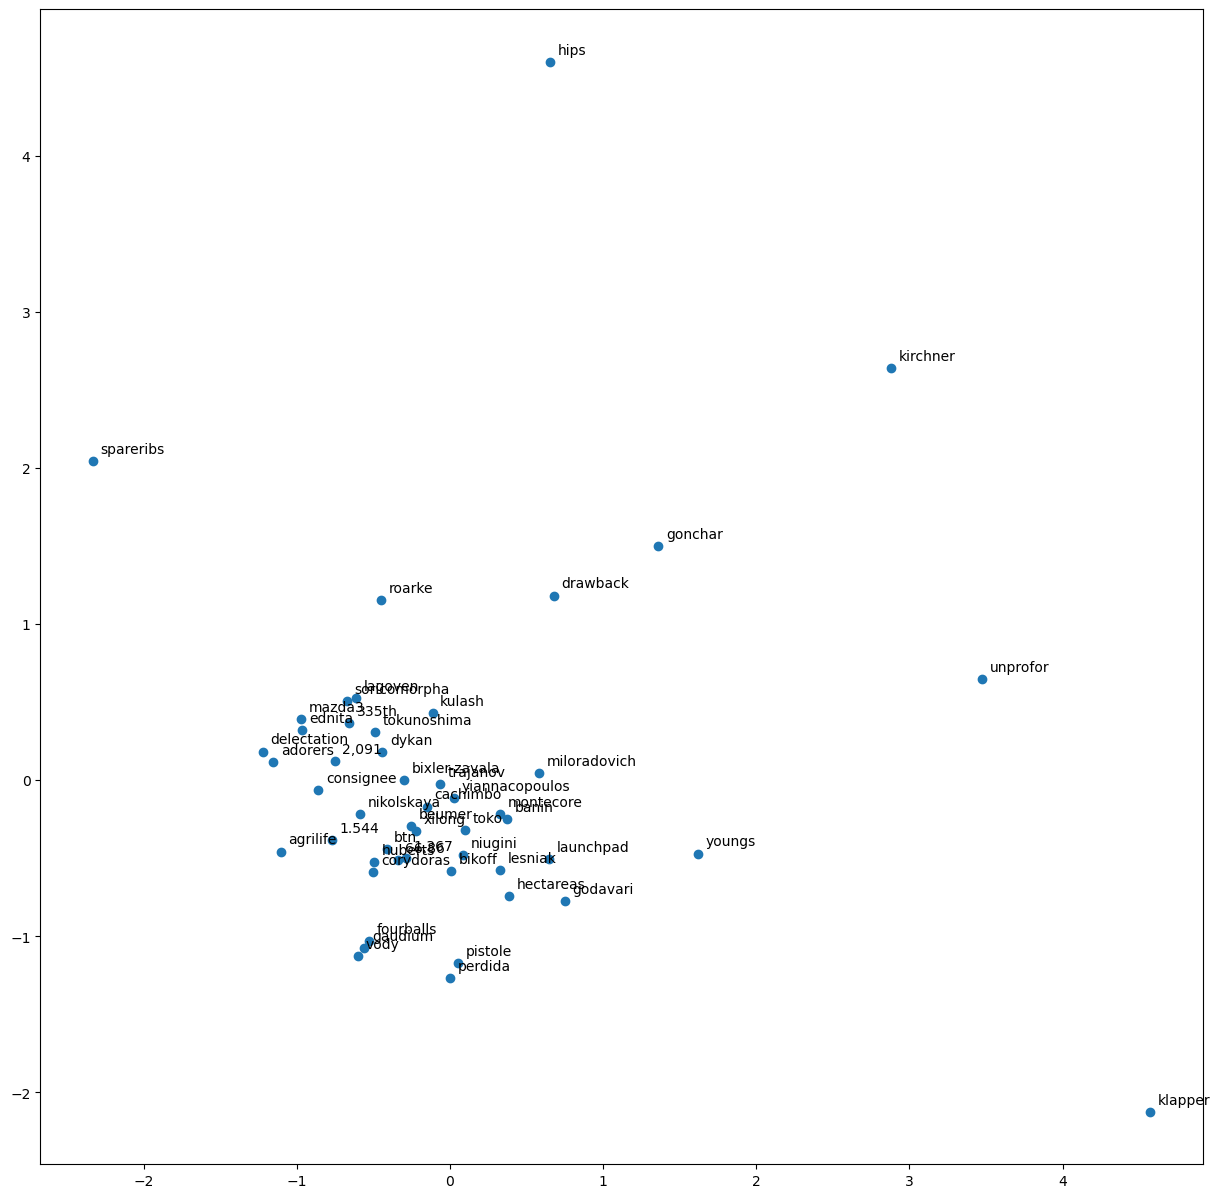

In [16]:
words=np.random.choice(data.index_to_key,50)  #lets see for random sample of words
word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(15,15))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)